In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv


In [3]:
df_train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')

### Data analysis

In [4]:
import matplotlib.pyplot as plt

In [5]:
df_train

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,two,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,two,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,two,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,one,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,two,438,108,0,0,0,0,0,0,3,2006.0,167240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,4,1,7.0,0,-1.0,zero,0,0,192,0,0,0,0,0,11,2008.0,130000
1130,3,1,6.0,0,1964.0,two,504,0,0,0,0,0,0,0,7,2008.0,145000
1294,3,1,7.0,1,1996.0,three,889,220,0,0,0,0,0,0,7,2009.0,265000


In [6]:
df_train.shape

(1168, 17)

#### Insight:

The dataset contains 1168 rows and 17 columns.

In [7]:
print("Summary:")
df_train.info()

Summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memor

In [8]:
df_train[df_train.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


#### Insight:
There are three rows with missing values.

In [9]:
print("Summary Statistics:")
print(f"Number different values per column\n{df_train.nunique()}")
df_train.describe()

Summary Statistics:
Number different values per column
BedroomAbvGr       8
KitchenAbvGr       3
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       98
GarageCars         5
GarageArea       387
WoodDeckSF       242
OpenPorchSF      184
EnclosedPorch    105
3SsnPorch         15
ScreenPorch       66
PoolArea           6
MiscVal           19
MoSold            12
YrSold             5
SalePrice        571
dtype: int64


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1167.000000,1168.000000
mean,2.872432,1.043664,6.497858,0.607877,1867.833904,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2007.802057,179163.845890
std,0.805929,0.212653,1.618330,0.630833,454.504382,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,1.327656,76848.682649
min,0.000000,1.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1957.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


In [10]:
print("Duplicate rows:")
df_train[df_train.duplicated(keep=False)].sort_values(by=df_train.columns.tolist())

Duplicate rows:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1057,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000
1389,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000


### Distribution of Numerical Features

Histograms of numerical features:


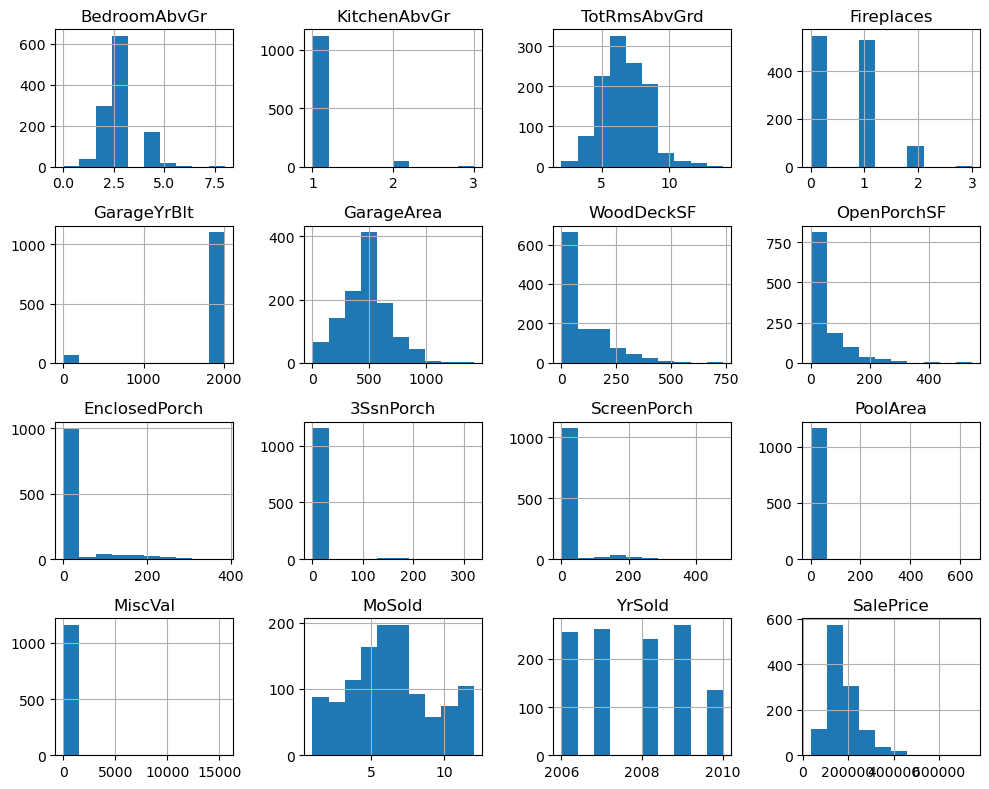

In [11]:
print("Histograms of numerical features:")
df_train.hist(figsize=(10, 8))
plt.tight_layout()  
plt.show()

### Outlier Detection


Box plots to check for outliers:


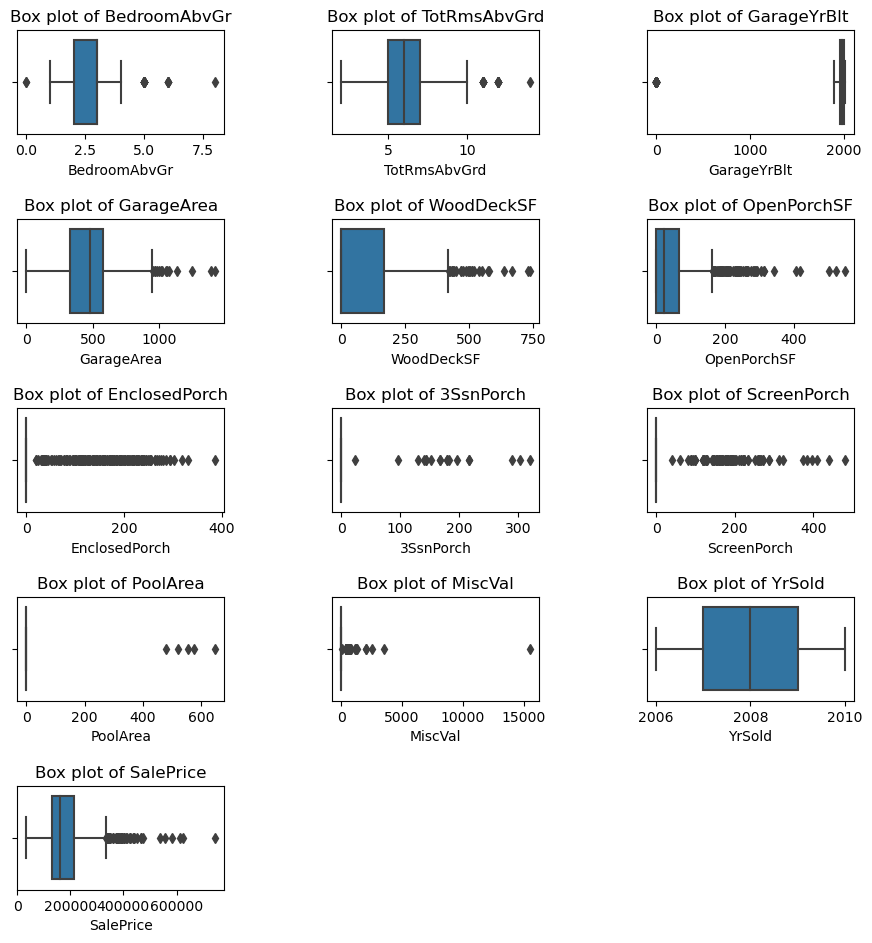

In [23]:
print("\nBox plots to check for outliers:")
numeric_cols = ['BedroomAbvGr','TotRmsAbvGrd','GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','YrSold', 'SalePrice']

# Set up the plot grid
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows*2))
fig.tight_layout(pad=4.0)

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_pos = i % n_cols
    sns.boxplot(x=df_train[col], ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Box plot of {col}')

# Remove empty subplots if the number of columns is odd
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()

For some characteristics, there are many outliers sometimes very far from the quartiles. This can be interpreted by the fact that a majority of households are part of the middle class, so the more affluent households are anomalies in the purely statistical analysis of this table (variable EnclosedPorch). This can also be due to the way missing data is handled, because it seems unlikely that the variable GarageYrBlt (representing a year) could take the value 0.

### Correlation Analysis

In [14]:
df_train.drop('GarageCars',axis=1,inplace=True)


Correlation matrix:


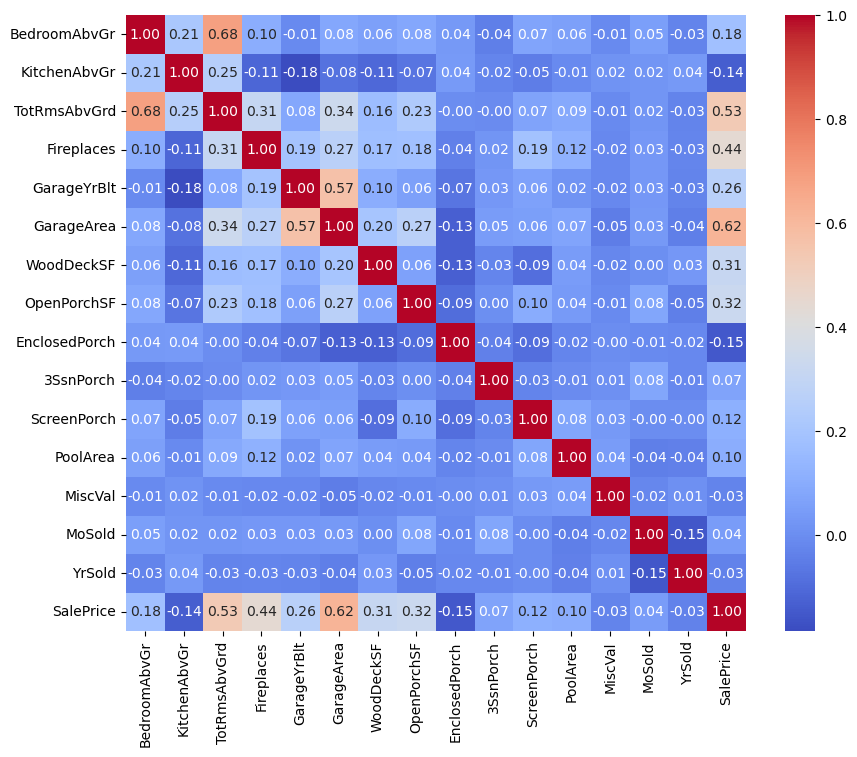

In [15]:
print("\nCorrelation matrix:")
corr_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

#### Insight:

1. ##### GarageCars:

Positive correlation with GarageArea (0.89): As expected, the number of cars a garage can hold is strongly related to the size of the garage.
Positive correlation with SalePrice (0.64): Larger garages (more car spaces) are positively associated with higher sale prices, indicating that garage capacity can significantly influence house value.

2. ##### GarageArea:

Positive correlation with SalePrice (0.62): Homes with larger garage areas tend to have higher sale prices, reflecting the added value of spacious garages.

3. ##### TotRmsAbvGrd (Total rooms above ground):

Positive correlation with SalePrice (0.53): Houses with more rooms above ground are likely to sell for higher prices, suggesting that larger homes are more valuable.

4. ##### Fireplaces:

Positive correlation with SalePrice (0.44): Homes with more fireplaces tend to have higher sale prices, indicating that fireplaces are a desirable feature.

5. ##### GarageYrBlt (Garage Year Built):

Positive correlation with GarageCars (0.60): More recently built garages tend to be larger or accommodate more cars, which might be due to modern design preferences.
Positive correlation with SalePrice (0.26): More recent garage construction is associated with higher sale prices, which could indicate that newer garages add more value to a home.

6. ##### WoodDeckSF (Wood deck area):

Positive correlation with SalePrice (0.31): Larger wood decks are positively associated with higher sale prices, showing that outdoor spaces contribute to home value.


Important correlation with 'SalePrice':


Text(0.5, 1.0, "Top Negative Correlations with 'SalePrice'")

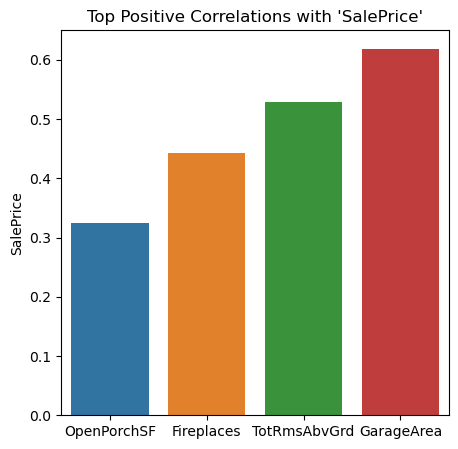

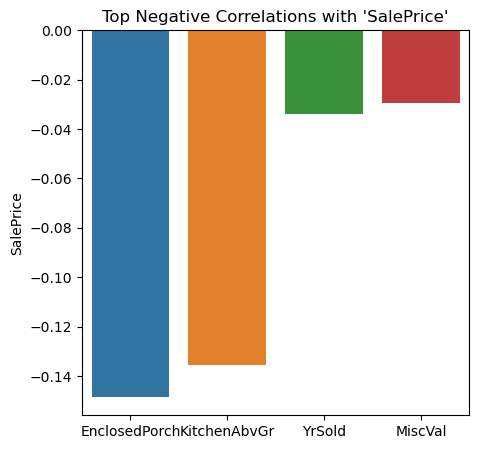

In [16]:
print("\nImportant correlation with 'SalePrice':")
corrs=df_train.corr().sort_values(by=['SalePrice'])['SalePrice'].iloc[:-1]

corrs_max=corrs[-4:]
corrs_min=corrs[:4]

fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(x=corrs_max.index,y=corrs_max)
plt.title("Top Positive Correlations with 'SalePrice'")
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(x=corrs_min.index,y=corrs_min)
plt.title("Top Negative Correlations with 'SalePrice'")


Pairplot of selected features:


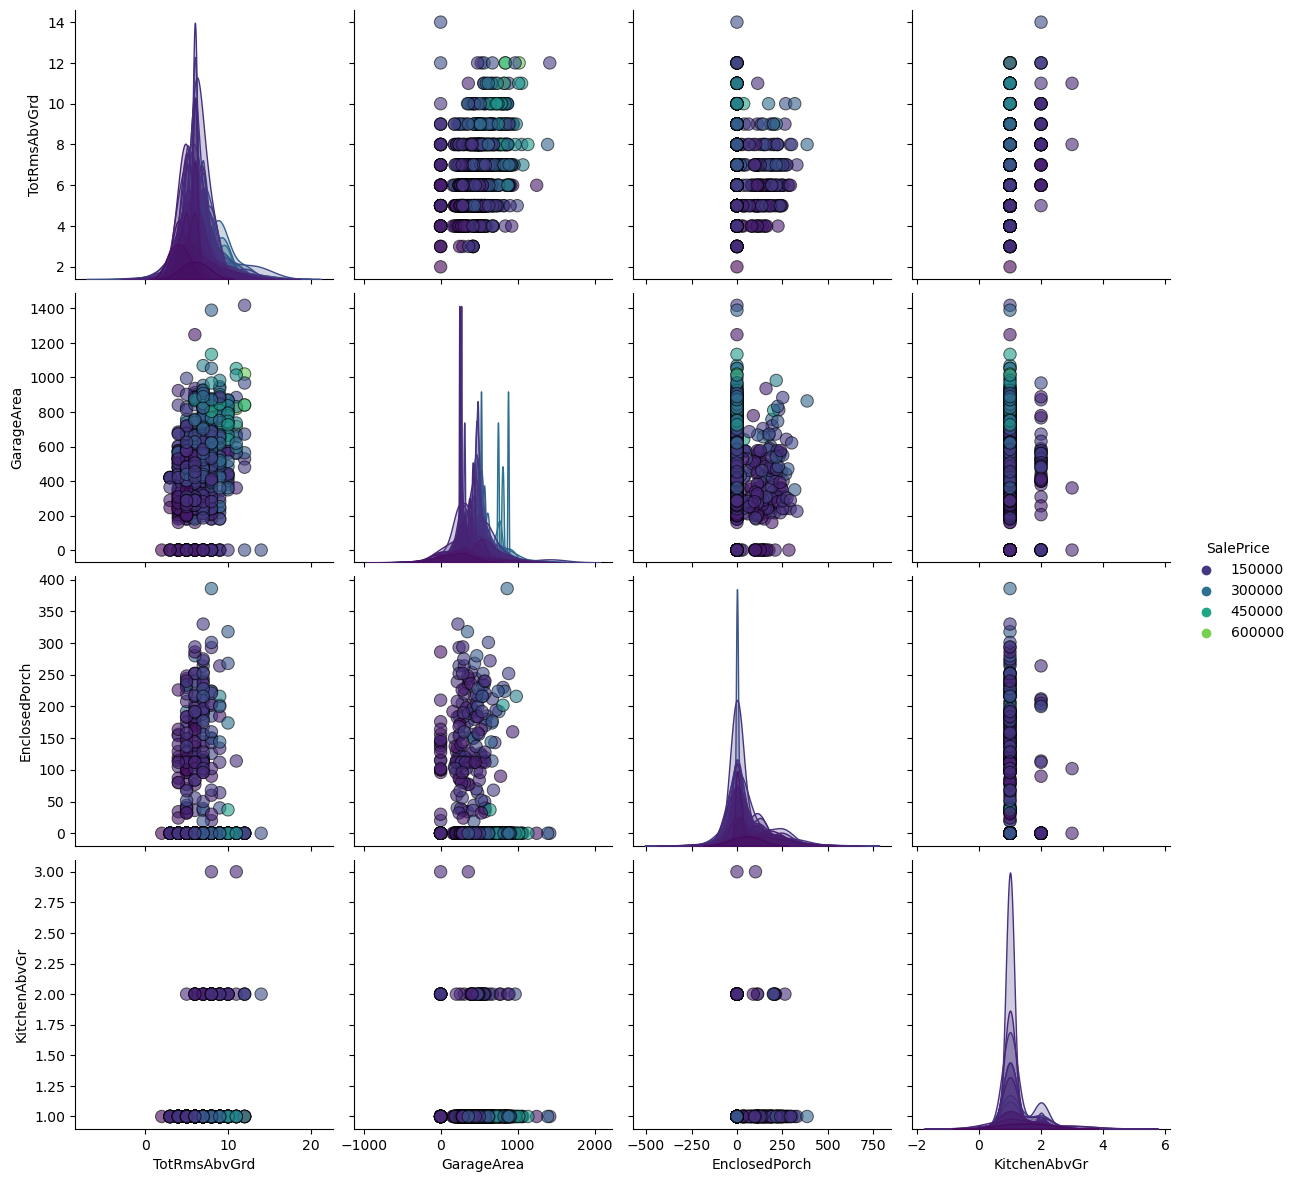

In [17]:
print('\nPairplot of selected features:')
selected_features=['TotRmsAbvGrd','GarageArea','EnclosedPorch','KitchenAbvGr','SalePrice']

sns.pairplot(df_train[selected_features],hue='SalePrice',palette='viridis',diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=3)

plt.show()

### Compare distribution of train and test data

In [18]:
X_test=pd.read_csv('module3_exercise_test.csv',sep=',',index_col='id')
X_test.drop('GarageCars',axis=1,inplace=True)

In [19]:
X_test.shape

(292, 15)

In [20]:
X_test.isnull().sum()

BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       1
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    1
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

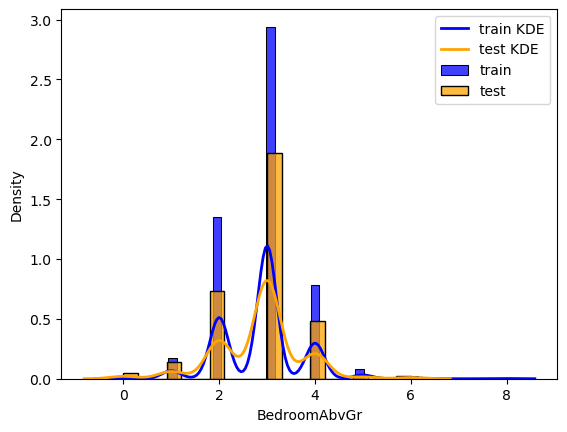

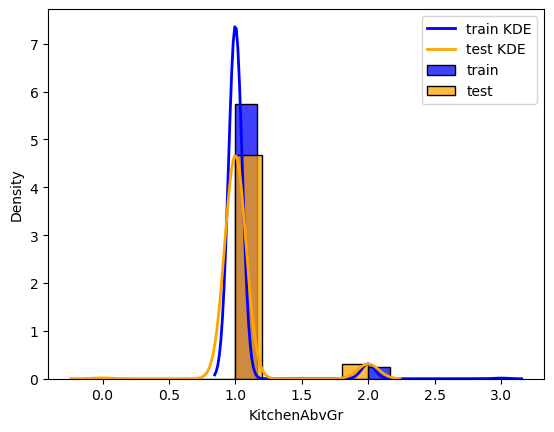

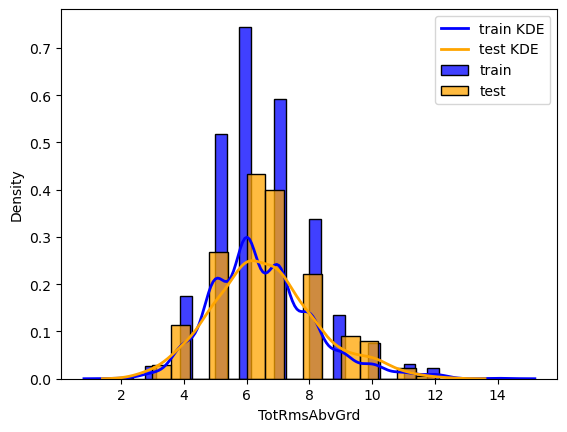

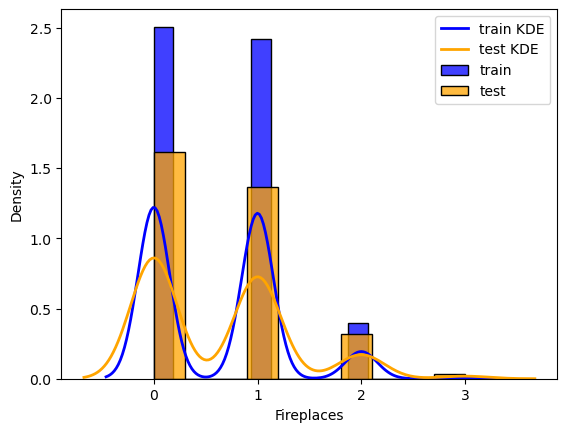

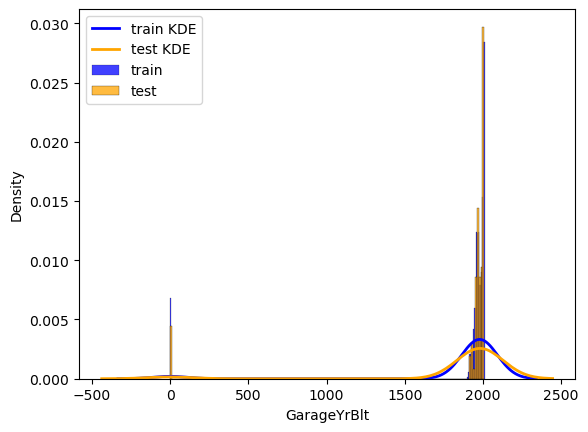

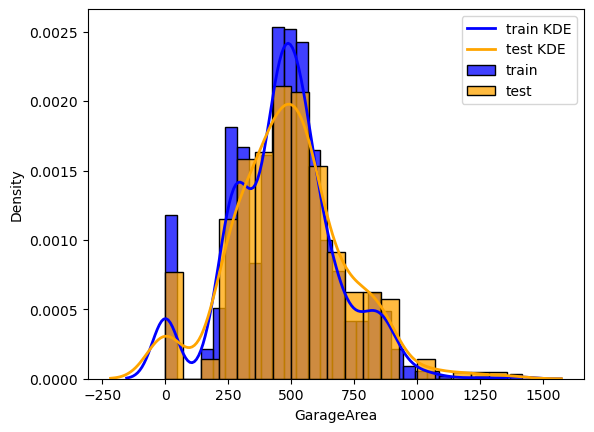

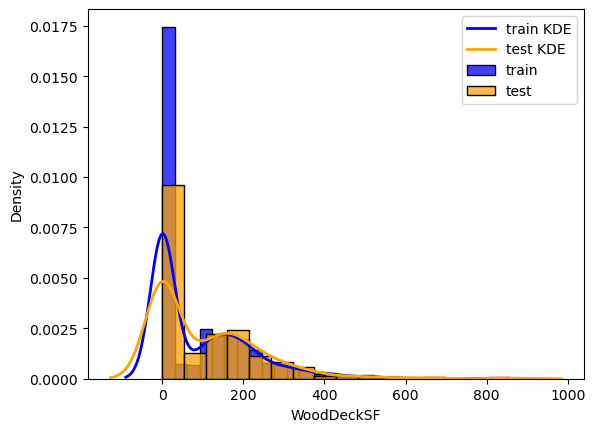

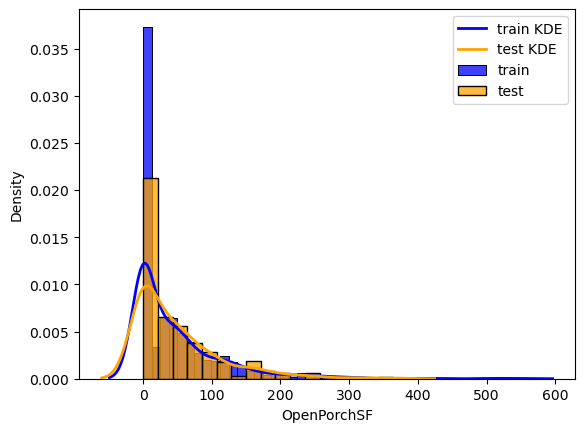

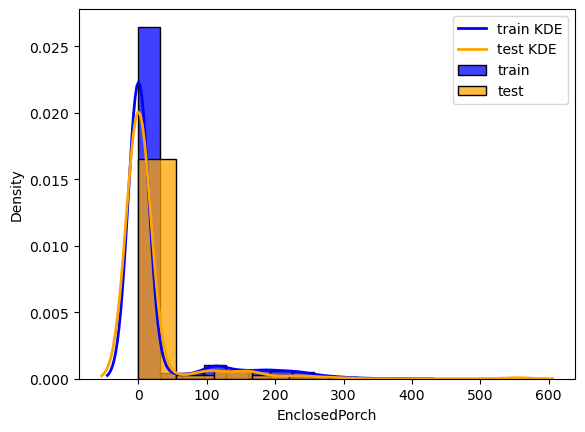

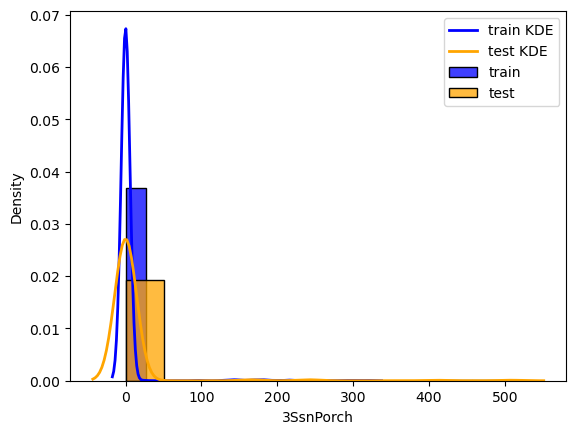

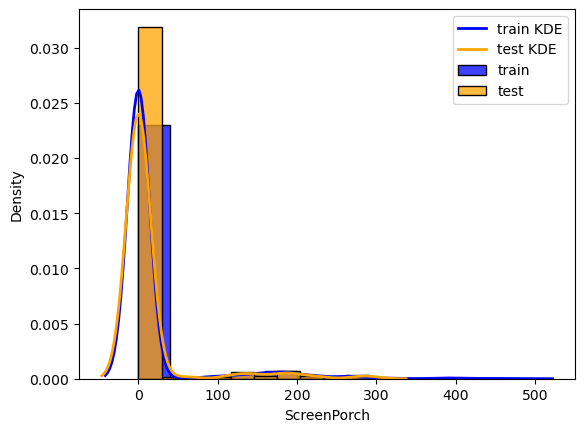

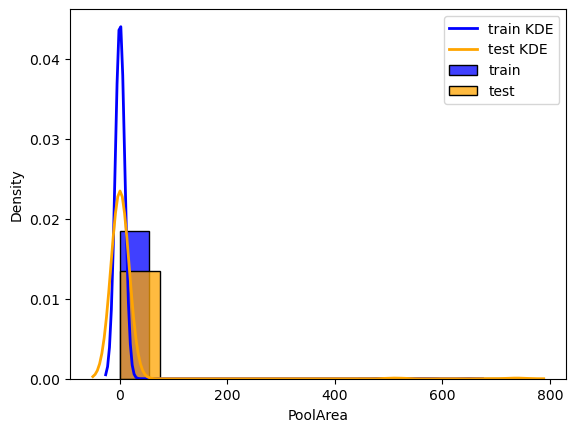

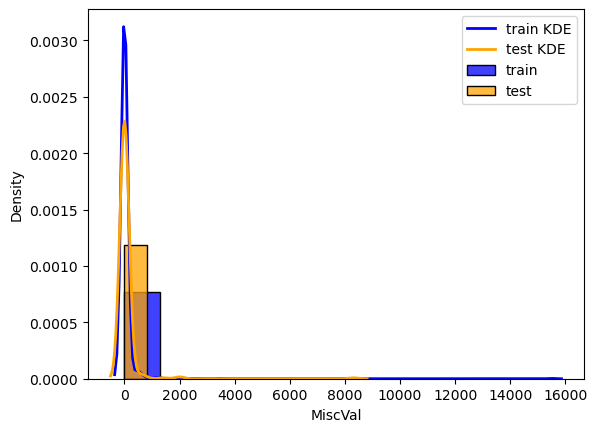

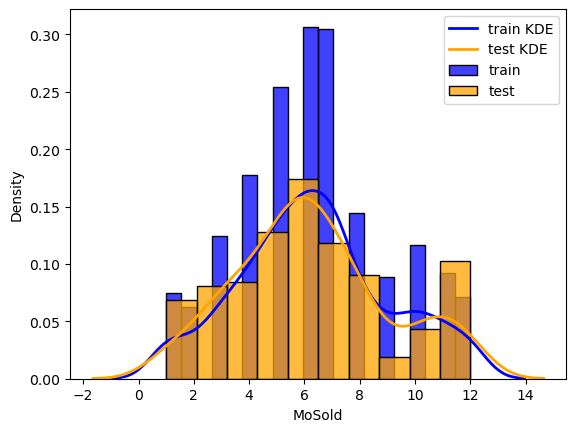

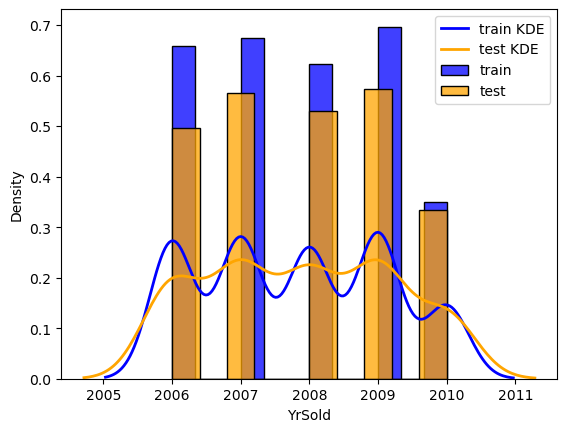

In [21]:
for col in X_test.columns:
    plt.figure()

    sns.histplot(df_train[col],label='train',color='blue',kde=False,stat='density')
    sns.histplot(X_test[col],label='test',color='orange',kde=False,stat='density')

    sns.kdeplot(df_train[col],color='blue',label='train KDE',linewidth=2)
    sns.kdeplot(X_test[col],color='orange',label='test KDE',linewidth=2)

    plt.legend()
    plt.show()